# Dimensionality Reduction
Many real life datasets ususally have many features in them. The higher the number of features the more complex the problem turns. This is because higher dimensions have more space than usual and it becomes harder to find patterns in them . This leads to a situation where training requires a lot of time. Considering practical situations, such time consuming trainng is not ideal. So, the data must be reduced to lower dimensions without losng much of the information. This is the aim of Dimensionaity Reduction. Dimensionaity reduction works best when two assumptions are true - 

* For any real life dataset with dimensions "n" there is a manifold in dimensions "d" such that the minimum information is lost (where n>d).

* The second implicit assumption is that training on lower dimensions is simpler (improves model).

The second assumption does not always hold true and thus usally leads to decreased performance of the model.

In [1]:
# Importing modules 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
def Beeper(song_name = "Beepers/beep_ring_tone.mp3"):
    """
    This plays a beeper song/song. Placing it after a cell informs us when 
    the execution of cell has been completed
    
    """
    current_dir = os.getcwd()
    path = os.path.join(current_dir, song_name)
    import IPython as ipd
    return ipd.display.Audio(path, autoplay = True)

In [3]:
def save_fig(filename, extension="png"):
    plt.savefig("./images/"+filename+"."+extension, format=extension)

In [4]:
def sorted_results(cv_results, reverse = True):
    """
    This function sorts the cv_results test score in descending order by default but can be changed by calling 
    reverse = False
    """
    test_scores = cv_results["mean_test_score"]
    indices = np.argsort(test_scores)[-1::-1]
    sorted_test_score = test_scores[indices]
    cv_params = cv_results["params"]
    return sorted_test_score, [cv_params[i] for i in indices]
    

def display_scores(results, reverse = True):
    """
    This function displays the sorted results and the parameters in the required order 
    """
    cv_results = results.cv_results_
    test_scores, params = sorted_results(cv_results, reverse = reverse)
    print("{0:5} {1}".format("SCORE : ", "PARAMS"))
    print("*"*100)
    for score, params in zip(test_scores, params):
        print("{0:5} : {1:}".format(score, params))
    print("*"*100)

## Principal Componenet Analysis
Principal Component analysis is a form of eigen problem in which the aim is to find the best axes to "project" the data onto lower dimensions. The axes are called the Principal Componenets and are computed using Sing Value Decomposition. Once the Principal Componenets are created, the requied number of dimensions can be extracted by using using Wt which contains the required number of Principal Components. The dot product of the instances and this Wt is the data compressed into the required number of dimensions.

In [5]:
# Creating 3D Data
three_data = np.random.rand(100,3,)
# Reduce this data to 2D

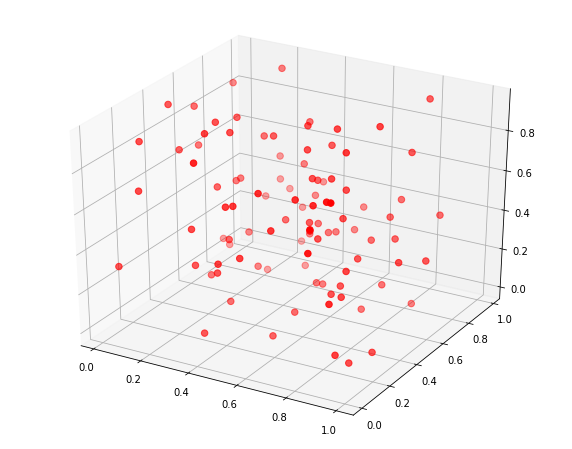

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = plt.subplot(111, projection = "3d")
ax.scatter(xs = three_data[:, 0], ys = three_data[:, 1],zs= three_data[:, 2], zdir = "z", s= 42, c = "r")
save_fig("3DImage")

plt.figure(figsize = (10, 8))
ax2 = plt.subplot(111, projection = "3d")
ax2.scatter(centred_data[:, 0], centred_data[:, 1], centred_data[:, 2])
plt.title("Centred Data")


In [7]:
# Reduce the data to 2D
centred_data = three_data - three_data.mean(axis = 0)
A, B, V = np.linalg.svd(centred_data)

# Data to 2 D
c1 =centred_data.dot(V[:, 0])
c2 = centred_data.dot(V[:, 1])

Text(0.5, 1.0, '3D data reduced to 2D')

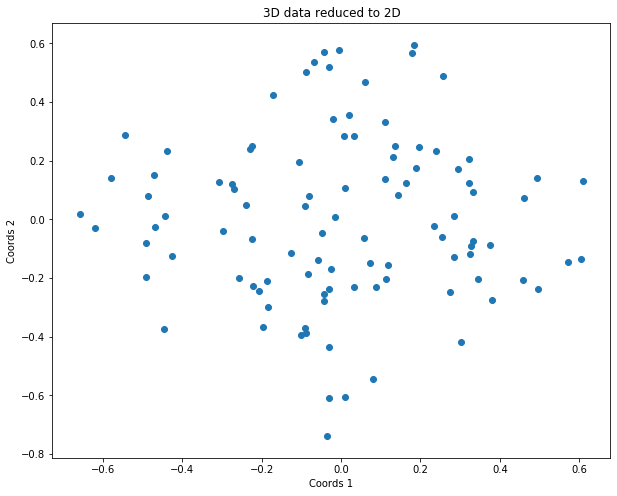

In [8]:
# Ploting the data in 2D
plt.figure(figsize = (10, 8))
plt.scatter(c1, c2)
plt.xlabel("Coords 1")
plt.ylabel("Coords 2")
plt.title("3D data reduced to 2D")

### Sci-kit Learn 

In [9]:
# Implement sci kit learn
from sklearn.decomposition import PCA
pca = PCA(2)


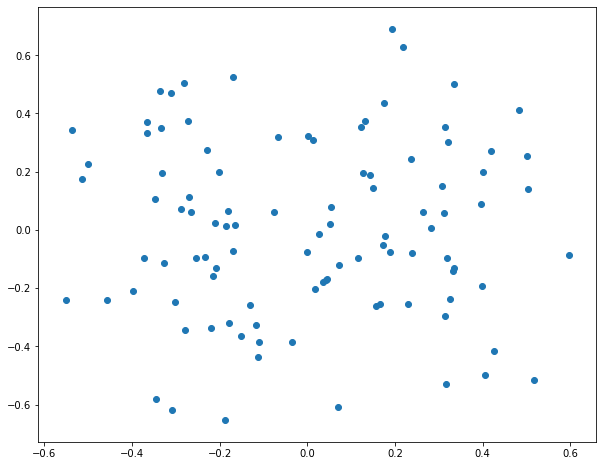

In [10]:
# Transforming the 3D data
two_d = pca.fit_transform(three_data)
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(two_d[:, 1], two_d[:, 0])

### Explained Variance Ratio
Explained Variance Ratio is the contribution of each component to the cumulative varaince. Explained Variance Ratio is an important feature for deciding the optimal number of dimensions to reduce to. 

In [11]:
# Loading the MNIST Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)

In [12]:
# Data 
X = mnist["data"]
y = mnist["target"]

In [13]:
# Method 1
# Finding the optimum number of dimensions using the cummulative EVR
pca = PCA()
X_reduced = pca.fit_transform(X)

In [14]:
# Creating cummulative score 
evr = pca.explained_variance_ratio_
cumm_ratio = np.cumsum(evr)

# Number of dimensions
dimensions = np.argmax(cumm_ratio>=0.95)+1

In [15]:
# The optimum number of dimensions is 154
X_reduced = PCA(n_components= dimensions).fit_transform(X)

In [16]:
X_reduced.shape
# THe number of dimensions is 154

(70000, 154)

In [17]:
# This process can be automated by dorectly using the n_componenes = the variance required
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X)

In [18]:
X_reduced.shape

(70000, 154)

### Training

In [19]:
# Train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.3)

In [21]:
# Training 
from sklearn.svm import LinearSVC, SVC

lsvc = SVC(kernel = "poly")
lsvc_model = lsvc.fit(X_train, y_train)

In [22]:
from sklearn.metrics import accuracy_score

test_preds = lsvc_model.predict(X_test)
acc = accuracy_score(y_test, test_preds)
print(acc) # 98% Accuracy

0.9818571428571429


In [23]:
Beeper()

### Graph
This is a graph between cumulative Explained Variance Graph and the number of dimensions

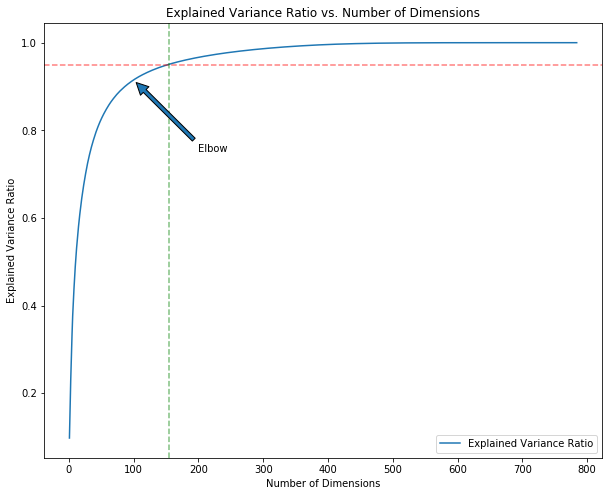

In [24]:
# Graph
dimensions = np.arange(len(cumm_ratio))+1
plt.figure(figsize=(10, 8))
plt.plot(dimensions, cumm_ratio, label="Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Dimensions")
plt.xlabel("Number of Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.legend()

# Marking the 0.95 Variance point
plt.axhline(0.95, alpha = 0.5, color = "r", ls = "--")
plt.axvline(154, alpha = 0.5, color = "g", ls = "--")
# Annotating
plt.annotate(xy = (100, cumm_ratio[99]), s = "Elbow",
             xytext = (200, 0.75), arrowprops = {"shrink":0.04}
                  )
save_fig("ExplainedVariance")

As the annotated graph shows, around 100 dimensions, growth in variance decreases. This point is called the elbow which is the point which can be a starting estimate for optmimum number of dimensions.

### Reconstruction of MNIST
Compressed data can be reconstructed using the inverse transform function of the PCA

In [25]:
# Reconstruct the MNIST data
X_reconstructed = pca.inverse_transform(X_reduced)

In [26]:
# Shape and clarity
X_reconstructed.shape # With 784 features

# Looking at one of the pictures
random_picture = X_reconstructed[6501]

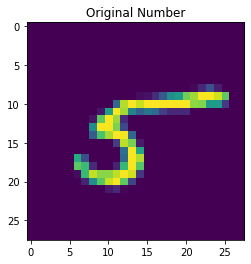

In [27]:
# Imshow 
plt.imshow(X[6501].reshape(28, 28))
plt.title("Original Number")
save_fig("OriginalNumber")

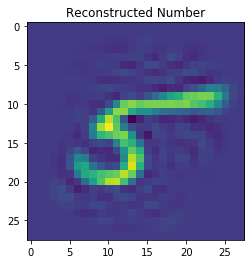

In [28]:
# Imshow
plt.imshow(random_picture.reshape(28, 28))
plt.title("Reconstructed Number")
save_fig("Reconstructed Number")

We can observe that some of the data is lost. We can observe smudges in the recreated data around the number. The quality of picture decreases but the **really important** parts such as the centre are preserved. This is PCA and its reconstruction. The RMSE between the orignal and PCA reconstruction is called the reconstruciton error

### PCA solvers
The svd_solvers in PCA are
* "auto" - Selects the best approach
* "randomized" - performs Stochastic Gradient 
* "full"  - performs full SVD 

### Incremental PCA
Incremental PCA is a process in which all PCA is trained using mini-batches of real train set. This may be done is the entire file is not readable due to memory retrictions or ois very slow. Incremental PCA is especially effective in "on the run" systems, such as online systems which need to update evertim enew data is presented with. This approach makes the training of PCA very easy and effective. 

The Incremental PCA will be trained on small batches of the MNIST train set. This will be achieved using the np.split functions. np.memmap is a tool used to save a data type onto a disk. This reduces the load on memory.

In [29]:
# Training a IPCA on mini-batches
from sklearn.decomposition import IncrementalPCA

Ipca = IncrementalPCA(n_components =143)

In [30]:
# Mini batches
n_batches = 100
for mini_batch in np.split(X, n_batches):
    Ipca.partial_fit(mini_batch)



In [31]:
# Looking at the Ipca
X_red = Ipca.transform(X)
X_red.shape

(70000, 143)

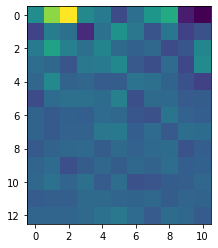

In [32]:
plt.imshow(X_red[12].reshape(13, 11))
save_fig("Incremental PCA")

### Using Memmap
Memmap uses a small portion of the data stored in binary file at a time. This keeps in control the memory usage for training the PCA.

In [33]:
# Dumping the MNIST data 
X.dump("mnist_instances")
y.dump("mnist_labels")

In [34]:
# Batches
m = 70000
n= 784
X_mem = np.memmap("mnist_instances", dtype = np.float, mode = "readonly", shape = (m,n))

# IPCA
batch_size = m//n_batches
Ipca = IncrementalPCA(batch_size = batch_size, n_components = 154)

# Fit - Fit can be used instea of partial_fit
#Ipca.fit(X_mem)

## Kernel PCA 
Kernel PCA is an example of unsupervised projection dimensionality reduction algorithm. It uses the kernel trick which transform the data in orignal space into data in infintie dimensions (which helps in linear seperation). So, basically, the kernel PCA turns to the dual form of the problem and aims to solve it. This dual form of the problem lies in infitine dimensions. This data is then projected back into the required number of dimensions. 

### Best Params for kPCA 
(using Pipelines and GridSearchCV)

In [35]:
# Swiss Roll Data
from sklearn.datasets import make_swiss_roll
X, Y = make_swiss_roll(5000)

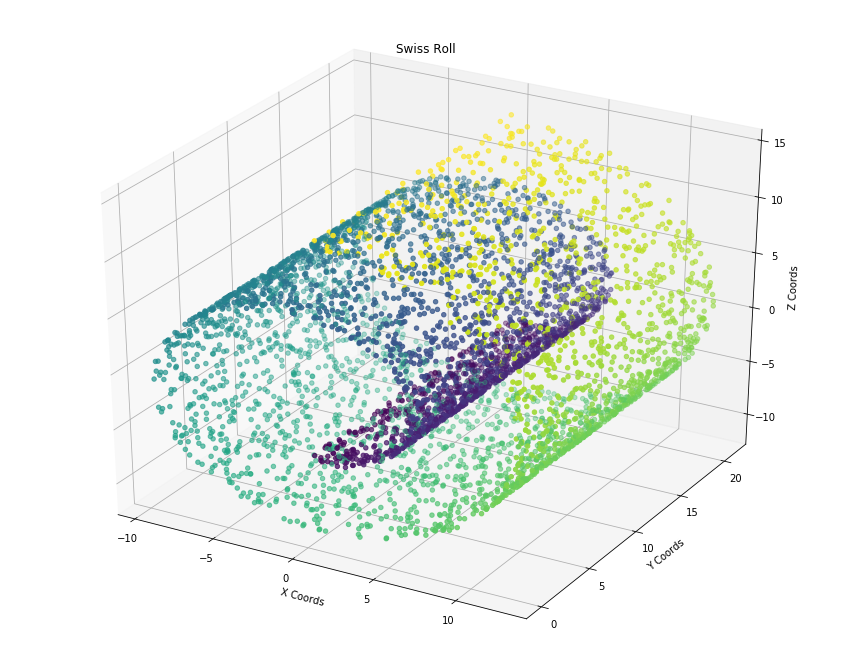

In [36]:
# Ploting the swiss roll
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mpd

fig = plt.figure(figsize = (15, 12))
ax = plt.subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = Y)
ax.set_title("Swiss Roll")
ax.set_xlabel("X Coords")
ax.set_ylabel("Y Coords")
ax.set_zlabel("Z Coords")
save_fig("PCASwissRoll")

In [37]:
# Import the requirements
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

GridSearchCV will be perfromed on a Pipeline with Parameters attached to it (a function has been written in Useful Functions document). The params will be attached by using the name of the PCA and '__parameter'

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import KernelPCA

In [39]:
# Creating the Pipeline for logistic Regression 
pca_pipeline= Pipeline([
    ("kPCA",KernelPCA(n_components = 2) ),
    ("log_clf", LinearRegression())
])

params_grid = [{
    "kPCA__gamma": np.linspace(0.4, 0.09, 15),
    "kPCA__kernel":["rbf", "sigmoid"]
}]


In [40]:
# Running the Pipeline and Grid Search CV
grid_cv = GridSearchCV(pca_pipeline, params_grid, cv = 3, scoring = "neg_mean_squared_error")
grid = grid_cv.fit(X, Y)


In [41]:
# Presenting the best parameters according to the mdoel
print(grid.best_params_)

{'kPCA__gamma': 0.09, 'kPCA__kernel': 'rbf'}


In [42]:
# Grid Results 
grid_results=grid
display_scores(grid_results)

SCORE :  PARAMS
****************************************************************************************************
-4.740252971891689 : {'kPCA__gamma': 0.09, 'kPCA__kernel': 'rbf'}
-4.870538344965468 : {'kPCA__gamma': 0.1121428571428571, 'kPCA__kernel': 'rbf'}
-5.085868467133977 : {'kPCA__gamma': 0.13428571428571423, 'kPCA__kernel': 'rbf'}
-5.311759977363257 : {'kPCA__gamma': 0.1564285714285714, 'kPCA__kernel': 'rbf'}
-5.515484997380906 : {'kPCA__gamma': 0.17857142857142855, 'kPCA__kernel': 'rbf'}
-5.686126870190489 : {'kPCA__gamma': 0.20071428571428568, 'kPCA__kernel': 'rbf'}
-5.8250463652445745 : {'kPCA__gamma': 0.22285714285714284, 'kPCA__kernel': 'rbf'}
-5.939416470524879 : {'kPCA__gamma': 0.245, 'kPCA__kernel': 'rbf'}
-6.038497994258339 : {'kPCA__gamma': 0.2671428571428571, 'kPCA__kernel': 'rbf'}
-6.134367472670519 : {'kPCA__gamma': 0.28928571428571426, 'kPCA__kernel': 'rbf'}
-6.252407402486701 : {'kPCA__gamma': 0.31142857142857144, 'kPCA__kernel': 'rbf'}
-6.460255133869825 : {'

In [43]:
Beeper()

In [44]:
kPCA = KernelPCA(n_components = 2, gamma = 0.09, kernel = "rbf")
X_Reduced = kPCA.fit_transform(X)

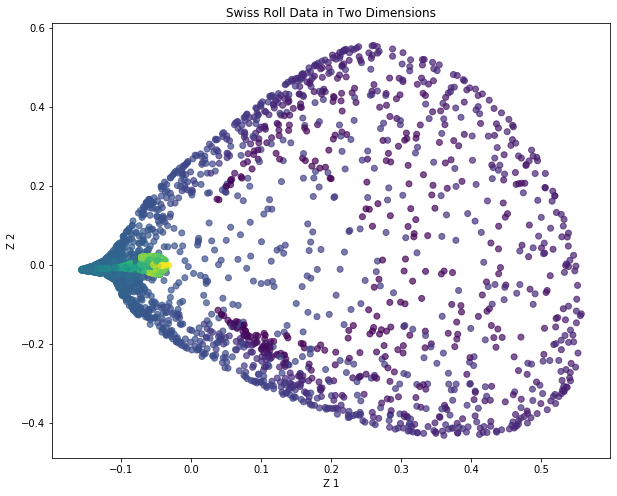

In [45]:
# PLoting the 2D data
plt.figure(figsize=(10, 8))
plt.scatter(X_Reduced[:, 0], X_Reduced[:, 1], c=Y, alpha = 0.7)
plt.title("Swiss Roll Data in Two Dimensions")
plt.xlabel("Z 1")
plt.ylabel("Z 2")
save_fig("SwissRollTwoDimensions")

### Finding the best parameters
(using the approximation of reconstruction error. This can be performed by seting the fit_inverse_transform to True.)
The aim of this exercise is to find the best parameters for kPCA. 

In [46]:
# Testing the fit_inverse_transform method on the kernelPCA
# Creating a new kPCA
kpca = KernelPCA(n_components = 2, fit_inverse_transform = True, n_jobs = -1)

In [47]:
# Pipeline to Fit the Data and looking at the approximation of reconstruction error
# The fit_inverse_transform returns a pre-image 
X_reduced = kpca.fit_transform(X)
X_preimage = kpca.inverse_transform(X_reduced)

In [48]:
# Finding the mean error 
from sklearn.metrics import mean_squared_error
error = mean_squared_error(X_preimage, X)
print(error) # So the mean error is 50.6

50.45608051072126


In [49]:
# Building a custom scorer for GridSearchCV
def reconstruction_error(estimator, X, y = None):
    """
    This program is to calculate the approximate mean squared error between
    original image and the pre-image.
    """
    from sklearn.metrics import mean_squared_error
    
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1*mean_squared_error(X, X_preimage)

In [50]:
reconstruction_error(kpca, X)

-50.45608051071668

In [51]:
# Pipeline
clf = Pipeline([
    ("kpca", kpca),
])

params_grid = [{
    "kpca__gamma": np.linspace(0.04, 0.09, 15),
    "kpca__kernel":["rbf", "sigmoid"]
}]

In [52]:
# Grid Search
grid = GridSearchCV(clf, params_grid, cv = 3, scoring = reconstruction_error)

# Fiting
results = grid.fit(X)


In [53]:
Beeper()

In [54]:
display_scores(results)

SCORE :  PARAMS
****************************************************************************************************
  nan : {'kpca__gamma': 0.09, 'kpca__kernel': 'sigmoid'}
  nan : {'kpca__gamma': 0.07214285714285715, 'kpca__kernel': 'sigmoid'}
  nan : {'kpca__gamma': 0.08642857142857144, 'kpca__kernel': 'sigmoid'}
  nan : {'kpca__gamma': 0.08285714285714285, 'kpca__kernel': 'sigmoid'}
  nan : {'kpca__gamma': 0.07928571428571429, 'kpca__kernel': 'sigmoid'}
  nan : {'kpca__gamma': 0.0757142857142857, 'kpca__kernel': 'sigmoid'}
-23.69639244755886 : {'kpca__gamma': 0.04, 'kpca__kernel': 'sigmoid'}
-26.06117633117003 : {'kpca__gamma': 0.04357142857142857, 'kpca__kernel': 'sigmoid'}
-29.4343248991643 : {'kpca__gamma': 0.047142857142857146, 'kpca__kernel': 'sigmoid'}
-30.768591918330376 : {'kpca__gamma': 0.04, 'kpca__kernel': 'rbf'}
-31.807115263611152 : {'kpca__gamma': 0.04357142857142857, 'kpca__kernel': 'rbf'}
-32.74905991109363 : {'kpca__gamma': 0.047142857142857146, 'kpca__kernel': 'rb

In [55]:
results.best_params_

{'kpca__gamma': 0.04, 'kpca__kernel': 'sigmoid'}

## Locally Linear Embedding
Locally Linear Embedding is a dimensionality reduction algorithm which considers "k" nearest neighbours and builds a linear relationship explaining the distances using a weights w matrix. These distances and relationships are preserved in the target hyperplanes and dimensions. This is a **manifold** learning algorithm unlike PCA. This learns the manifold present in the data and uses it to reduce dimensions. 

In [56]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 15)

In [57]:
# Fiting on the Swiss roll set
X_reduced = lle.fit_transform(X)

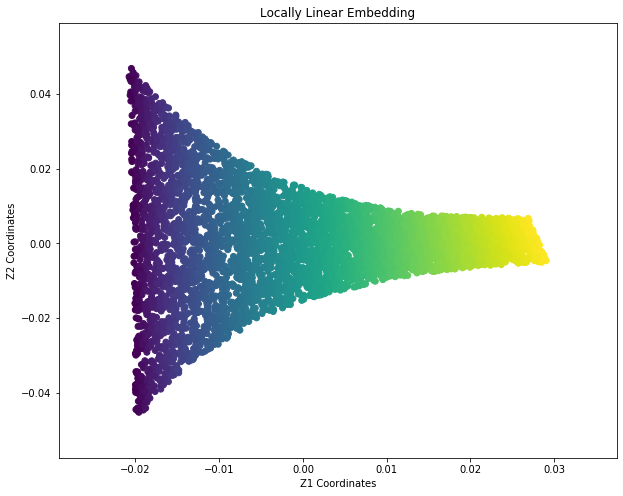

In [58]:
# Ploting the reduced dimensions
plt.figure(figsize = (10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = Y)
plt.title("Locally Linear Embedding")
plt.xlabel("Z1 Coordinates")
plt.ylabel("Z2 Coordinates")
save_fig("LocallyLinearEmbedding")

It can be seen that local distances of similar instances are maintained well but global distances are not mantained.This ca be seen in the above graph where in the extreme left elements are suashed while the extreme right elements are stretched. But, it is very good in establishing similarity and disimilarity.

As the number of neighbors incerase the shape becomes more dominant. So, an optimal number of neighbors must be selected. This can be done by using a Pipeline and GridSearch CV with the estimator. Or, the reconstruction error can be considered via **custom scoring** as previously done. 

## Other Dimensionality Reduction Algorithms

* Multidimensional Scaling
* Isospace
* t-Stochastic Neighbors Embedding (Good for data visualization; keeps clusters together)
* Linear Discriminatory Analysis (Classification algorithm which learns the axes with highest discrimination; useful before   classification)
* Random Projection

In [59]:
# Performing dimensionality reduction using some of these algorithms
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

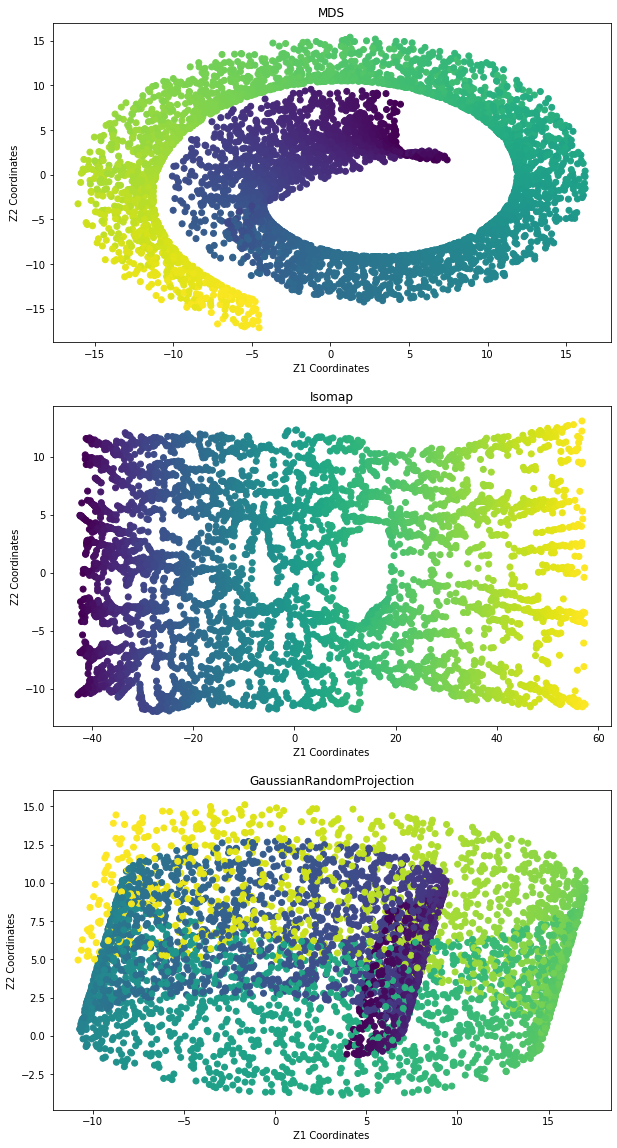

In [60]:
# ALgorithms 
alg_list = [MDS(n_components = 2), Isomap(n_components=2), GaussianRandomProjection(n_components = 2)]
fig, axes = plt.subplots(len(alg_list), figsize=(10, 20))
for ax, alg in zip(axes, alg_list):
    # Fit and Transform 
    X_red = alg.fit_transform(X)
    ax.scatter(X_red[:, 0], X_red[:, 1], c = Y)
    ax.set_title(alg.__class__.__name__)
    ax.set_xlabel("Z1 Coordinates")
    ax.set_ylabel("Z2 Coordinates")
save_fig("MultidimensionalScaling")

In [61]:
X_red = alg_list[0].fit_transform(X)


In [62]:
Beeper()

## Exercises

### 9. Performance with and without Dimensionality Reduction
In this exercise, a RandomForestClassifier will be used to perfrom classification on the MNIST dataset. The aim is to time the task with and without dimensionality reduction. 

In [63]:
# Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)

In [64]:
# Train and Test sets
X = mnist["data"]
y = mnist["target"]

# Train and test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [65]:
# Using the time module 
import time
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs = -1, n_estimators = 100)

In [66]:
# Performing training without 
t0 = time.time()
# Fiting without dimensionality reduction 
rf_model  = rf_clf.fit(X_train, y_train)
t1 = time.time()
print(t1-t0)

32.53959655761719


36 seconds are elapsed for training without dimensionlity reduction.

In [67]:
# Evaluating the model on the test set
from sklearn.metrics import accuracy_score

rf_preds = rf_clf.predict(X_test)

without_reduction = accuracy_score(y_test, rf_preds)
print(without_reduction) # 96.9% accuracy

0.9704


### Dimensonality Reduction
Now the number of dimensions are to be reduced using dimensionality reduction alorithmn. 

In [68]:
# Using the Linear PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

# Transforming the train and test datasets
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [69]:
# 154 dimensions are present in the data
# Training with dimensionalit reduction 

rf = RandomForestClassifier(n_jobs = -1, n_estimators = 100)

In [70]:
t0 = time.time()
# Training
rf_model = rf.fit(X_train_reduced, y_train)
t1 = time.time()
print(t1-t0)

50.77993035316467


In [71]:
# Evaluation on the test set
reduced_preds = rf_model.predict(X_test_reduced)
with_reduction = accuracy_score(y_test, reduced_preds)
print(with_reduction) # The accuracy is down to 94.8% accuracy

0.9478


In [72]:
Beeper()

The reduction in dimensionality has actually increased the trainnig time by a factor of two. This is also followed with a reduced performance. So, for RandomForestClassifier, the performance has reduced. Trying the same process with a Softmax Regression (Multilabel Logistic Regression)

### Softmax (Without reduction)

In [73]:
# Training
from sklearn.linear_model import LogisticRegression

softmax = LogisticRegression(multi_class = "multinomial")

In [74]:
# Training
t0 = time.time()
softmax_model = softmax.fit(X_train, y_train)
t1 = time.time()
print(t1-t0)

26.443087100982666


In [75]:
# Evaluting the model 
preds = softmax_model.predict(X_test)
without_reduction = accuracy_score(y_test,preds)
print(without_reduction)

0.9255


### Softmax(with reduction)

In [76]:
# Calling the funciton
softmax = LogisticRegression(multi_class = "multinomial")

In [77]:
# Training
t0 = time.time()
softmax_model = softmax.fit(X_train_reduced, y_train)
t1 = time.time()
print(t1-t0)

9.630903482437134


In [78]:
# Evaluating the model
preds=softmax_model.predict(X_test_reduced)
with_accuracy = accuracy_score(y_test, preds)
print(with_accuracy)

0.9201


Here, in the case of LogisticRegression, the time decrease by 2x while the decrease in performance is only about 0.004. This is a favorable trade off where in the slight decrease in performance is traded off for twice the speed in training.

**Conclusions**
So, it can be concluded that dimensionality reduction algorithms aim at reducing time (first assumption) but it is not always the case. Sometimes, it increases and complicates the task. So, the effectiveness of dimensionality redution completely depends on the dataset.

### 10. t-SNE 
t-SNE or Stochastic Neighbors Embedding is an algorithm which aims at keeping clusters together and dissimilar instances away from each other. This algorithm is best used for data visualization. The algorithm calculates local distances along a manifold of lower dimensions and preserves them while transforming across dimensions. 

Aim: The aim of this exercise is to use the t-SNE algorithm to condense the clusters of MNIST dataset into 2 Dimensions and plot it for visualization. The additional aim is to use different algorithms to perform the same task and look at how the visualizations occur.

In [79]:
# Importing the different dimensionality reduction algorithms
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

algs = [MDS(), Isomap(),LinearDiscriminantAnalysis()]

In [80]:
# Preparing a random sample of data
X_random = X[:5000]
y_random = y[:5000].astype(np.uint32)

In [81]:
# Using t-SNE to reduce MNIST data into 2 dimesions
tsne = TSNE(n_components = 2)

# Reducing the MNIST data
X_2d = tsne.fit_transform(X_random)

In [82]:
# Importing the required modules
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib as mpl

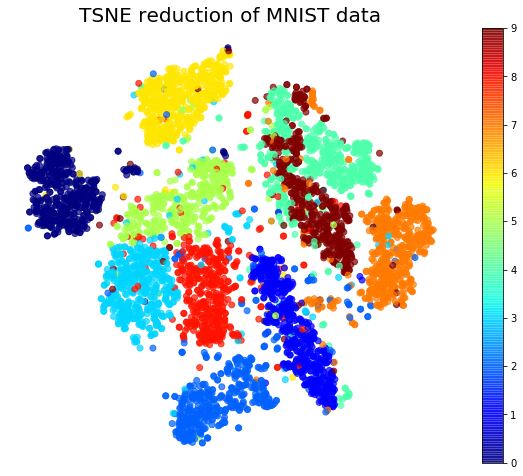

In [83]:
# Plotting the graph with 200 data points
plt.figure(figsize = (10, 8))
plt.title("TSNE reduction of MNIST data", fontsize = 20)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c = y_random.astype(np.uint8), cmap = "jet", alpha = 0.7)
plt.colorbar()
plt.axis("off")
save_fig("TSNEReductionOnMNIST")

We can see that some labels have very well defined clusters (such as 6s, 0s, 7s). Some other labels (such as 4s and 9s ) overlap. Examining these clusters.

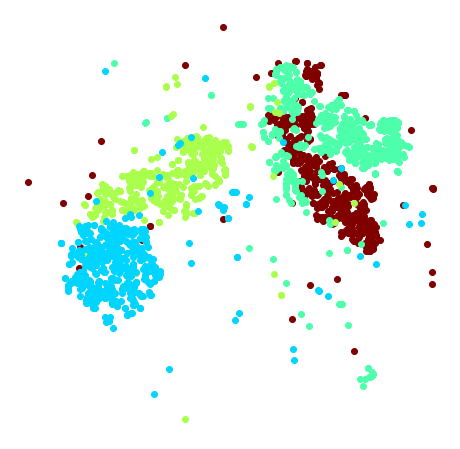

In [84]:
# Ploting only 9s, 4s, 5s and 3s
digits = [9, 4, 5, 3]
cmap = mpl.cm.get_cmap("jet")
plt.figure(figsize=(8, 8))
for digit in digits:
    digit_mask = y_random ==digit
    plt.scatter(X_2d[digit_mask, 0], X_2d[digit_mask, 1], c =[cmap(digit/9)] )
    
plt.axis("off")
#plt.show()
save_fig("NumberClusters")
    

A nicer picture ca be generated by running the t-SNE on these labels.

In [85]:
# Digits 
digit_mask = (y_random == 9)|(y_random == 4)|(y_random == 5)|(y_random == 3)

# Transforming the dataset with these digits
tsne_digits = TSNE(n_components = 2)
X_digits = tsne_digits.fit_transform(X_random[digit_mask])

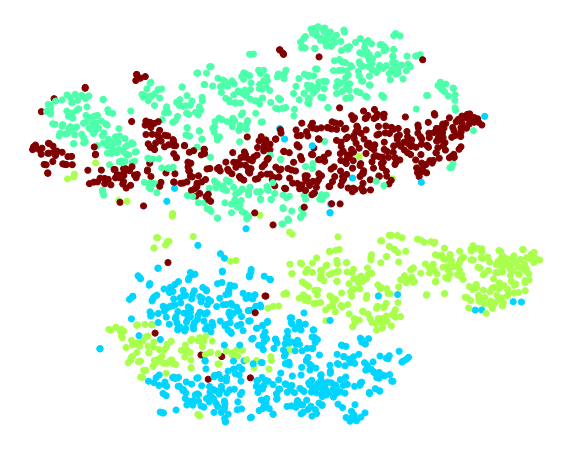

In [86]:
# Plotting the data
plt.figure(figsize=(10, 8))
cmap = mpl.cm.get_cmap("jet")
plt.scatter(X_digits[:, 0], X_digits[:, 1], c = cmap(y_random[digit_mask]/9))
plt.axis("off")
plt.show()

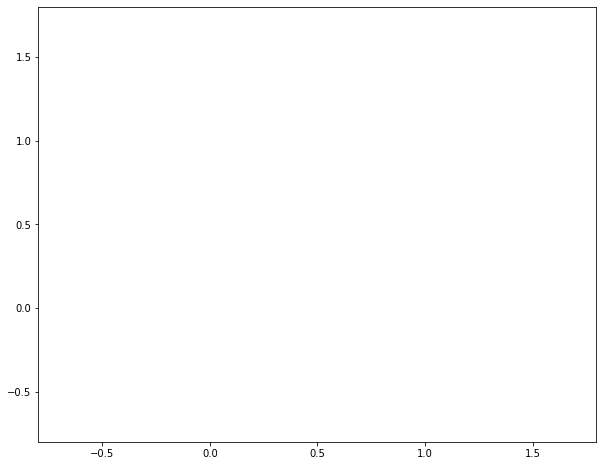

In [87]:
# Improved Visualiation 
# Having minature versions of the digit as the points

# Controls
minimum_distance = 0.05
neighbours = np.array([[10., 10.]])
images = None

from sklearn.preprocessing import MinMaxScaler

# Normalizing
normalizer = MinMaxScaler()
X_norm = normalizer.fit_transform(X_2d)

# Plotting the data 
plt.figure(figsize=(10, 8))
digits = np.unique(y)
cmap = mpl.cm.get_cmap("jet")
for number in digits:
    plt.scatter(X_norm[y_random==number, 0], X_norm[(y_random == number),1], c = [cmap(digit/9)])
    

# Calculate distance
for index, image_coords in enumerate(X_norm):
    closest_distance = np.linalg.norm(np.array(neighbours)-image_coords, axis = 1).min()
    if closest_distance>minimum_distance:
        neighbours = np.r_[neighbours, [image_coords]]
        if images == None:
            pass
        

### Plotting Function
(This section is about creating a ploting function)

In [88]:
# Improved Ploting 
# Controls 
X_reduced = X_2d.copy()
y_reduced = y_random.copy()
minimum_distance = 0.05
images = None


In [89]:
# normalized
X_norm = MinMaxScaler().fit_transform(X_reduced)

(-0.055930586461113464,
 1.0562627457909097,
 -0.05768287389199058,
 1.0575928037289049)

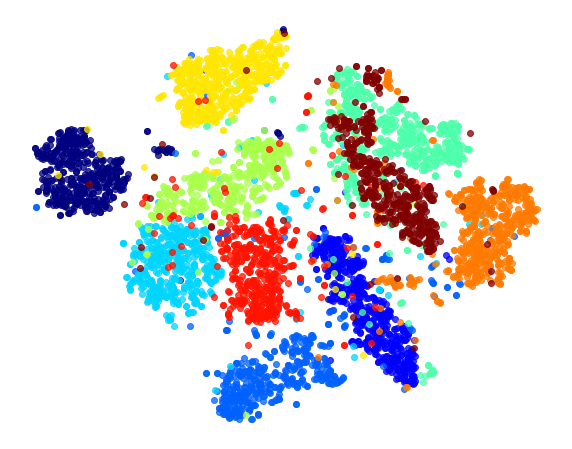

In [90]:
# plotting
cmap = mpl.cm.get_cmap("jet")
labels = np.unique(y_reduced)
plt.figure(figsize=(10, 8))
for digit in labels:
    digit_mask = y_reduced == digit
    plt.scatter(X_norm[digit_mask, 0], X_norm[digit_mask, 1], c=[cmap(digit/9)], alpha = 0.75)
plt.axis("off")


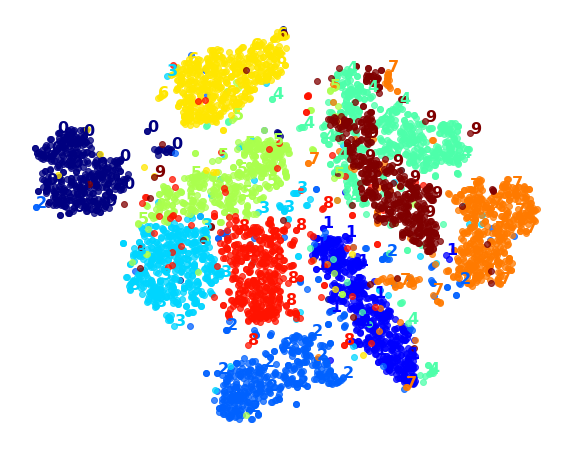

In [91]:
# Distances & Digits
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
images = None

cmap = mpl.cm.get_cmap("jet")
labels = np.unique(y_reduced)
plt.figure(figsize=(10, 8))
for digit in labels:
    digit_mask = y_reduced == digit
    plt.scatter(X_norm[digit_mask, 0], X_norm[digit_mask, 1], c=[cmap(digit/9)], alpha = 0.75)
plt.axis("off")

# Getting the active axes 
ax = plt.gcf().gca() # Get current figure, get current axes

neighbours = np.array([[10, 10]])
for index, image_coords in enumerate(X_norm):
    closest_distance = np.linalg.norm(np.array(neighbours)-image_coords, axis = 1).min() 
    # Returns the minimum of matrix with all the distances
    # If too close, do not accept the point
    if closest_distance > minimum_distance:
        # append the coordinated of point to neighbours
        neighbours = np.r_[neighbours, [image_coords]]
        # All the points following these rules lie in the list
        if images is None:
            # Get the labels 
            label = y_reduced[index]
            # Print the number near the coordinates of the point
            ax.text(image_coords[0], image_coords[1], int(label), 
                    color = cmap(label/9),fontdict = {"weight":"bold", "size":16})
            # Perform the function wel
        else:
            # Get the image array
            image_array = images[index].reshape(28, 28)
            image_box = AnnotationBbox(OffsetImage(image_array, cmap= "binary"), image_coords)
            ax.add_artist(image_box)

In [92]:
def plot_digits(X_reduced, y_reduced, images = None, min_distance = 0.05, figsize=(13, 10)):
    """
    This function is about plotting digits near a visualization of MNIST data in 2 Dimensions.
    """
    
    # Normalization
    from sklearn.preprocessing import MinMaxScaler
    X_norm = MinMaxScaler().fit_transform(X_reduced)
    y_reduced = y_reduced.astype(np.uint32)
    
    
    # Plotting 
    fig, ax = plt.subplots(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    labels = np.unique(y_reduced)
    for digit in labels:
        digit_mask = y_reduced == digit
        ax.scatter(X_norm[digit_mask, 0], X_norm[digit_mask, 1], color = cmap(digit/9))
    
    
    # Get active axes
    ax = plt.gcf().gca()
    
    # Distances & Digits
    neighbours = np.array([[10., 10.]]) # We assume a starting point to avoid if loops
    for index, image_coords in enumerate(X_norm):
        # Calculate distance to every other neighbour
        closest_distance = np.linalg.norm(np.array(neighbours)-image_coords, axis = 1).min() 
        # Returns the minimum of matrix with all the distances
        # If too close, do not accept the point
        if closest_distance > minimum_distance:
            # append the coordinated of point to neighbours
            neighbours = np.r_[neighbours, [image_coords]]
            # All the points following these rules lie in the list
            if images is None:
                # Get the labels 
                label = y_reduced[index]
                # Print the number near the coordinates of the point
                ax.text(image_coords[0], image_coords[1], int(label), 
                    color = cmap(label/9),fontdict = {"weight":"bold", "size":16})
                # Perform the function wel
            else:
                # Get the image array
                image_array = images[index].reshape(28, 28)
                image_box = AnnotationBbox(OffsetImage(image_array, cmap= "binary"), image_coords)
                ax.add_artist(image_box)
                
    ax.axis("off")
    

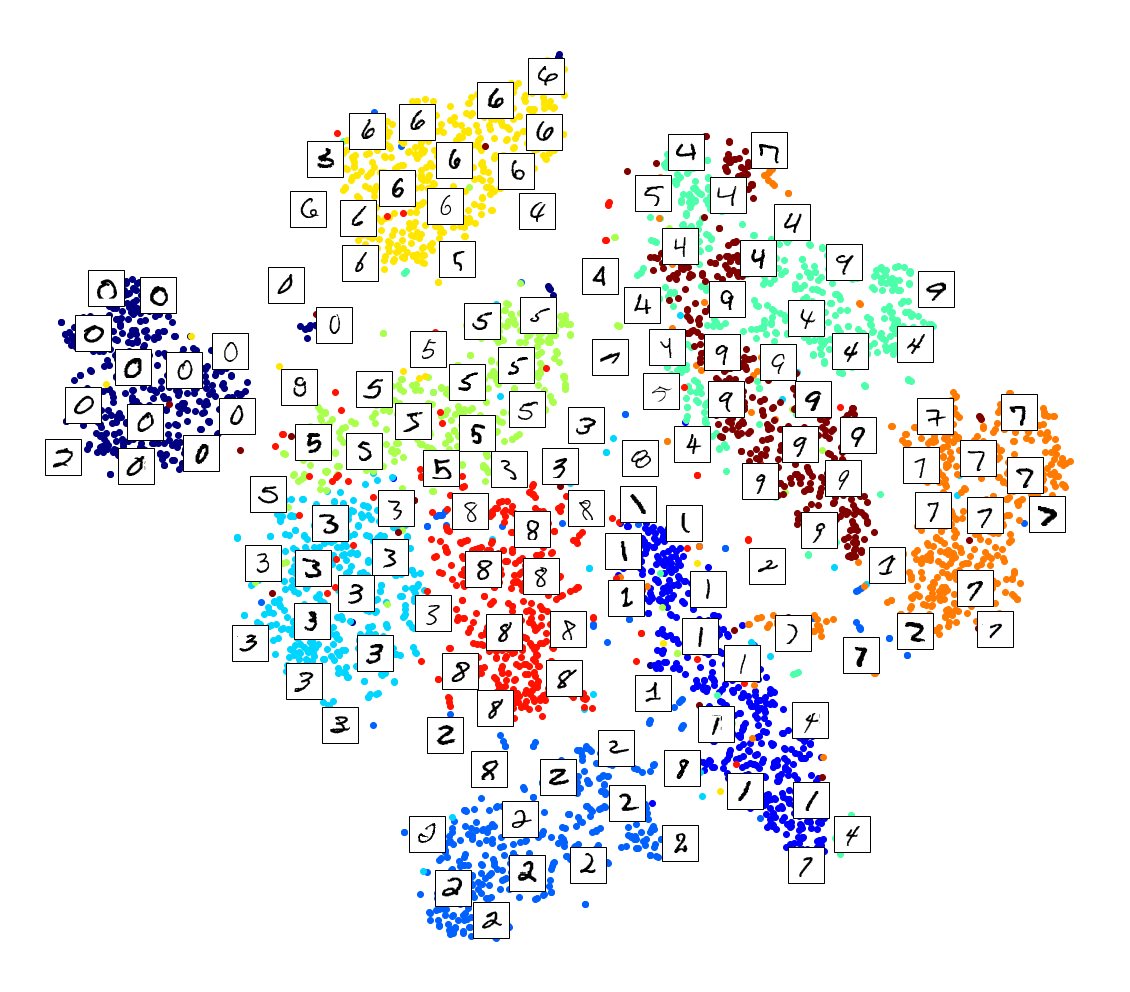

In [93]:
plot_digits(X_reduced, y_reduced, X, figsize = (20, 18))

The plot funciotn is now complete. Now Visualization will be achieved using differnt Algorithms

### Visualizations using Differnt Algorithms

In [94]:
# import
import time

In [95]:
# Data
instances = 2000
X_random, y_random = X[:instances], y[:instances]

In [96]:
# Calling algorithms
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS
from sklearn.decomposition import PCA, KernelPCA

In [97]:
# List of Algorithms
n_components = 2

alg_list = [MDS(n_components), LocallyLinearEmbedding(n_components = 2), 
            PCA(n_components), KernelPCA(n_components, kernel ="rbf") ]

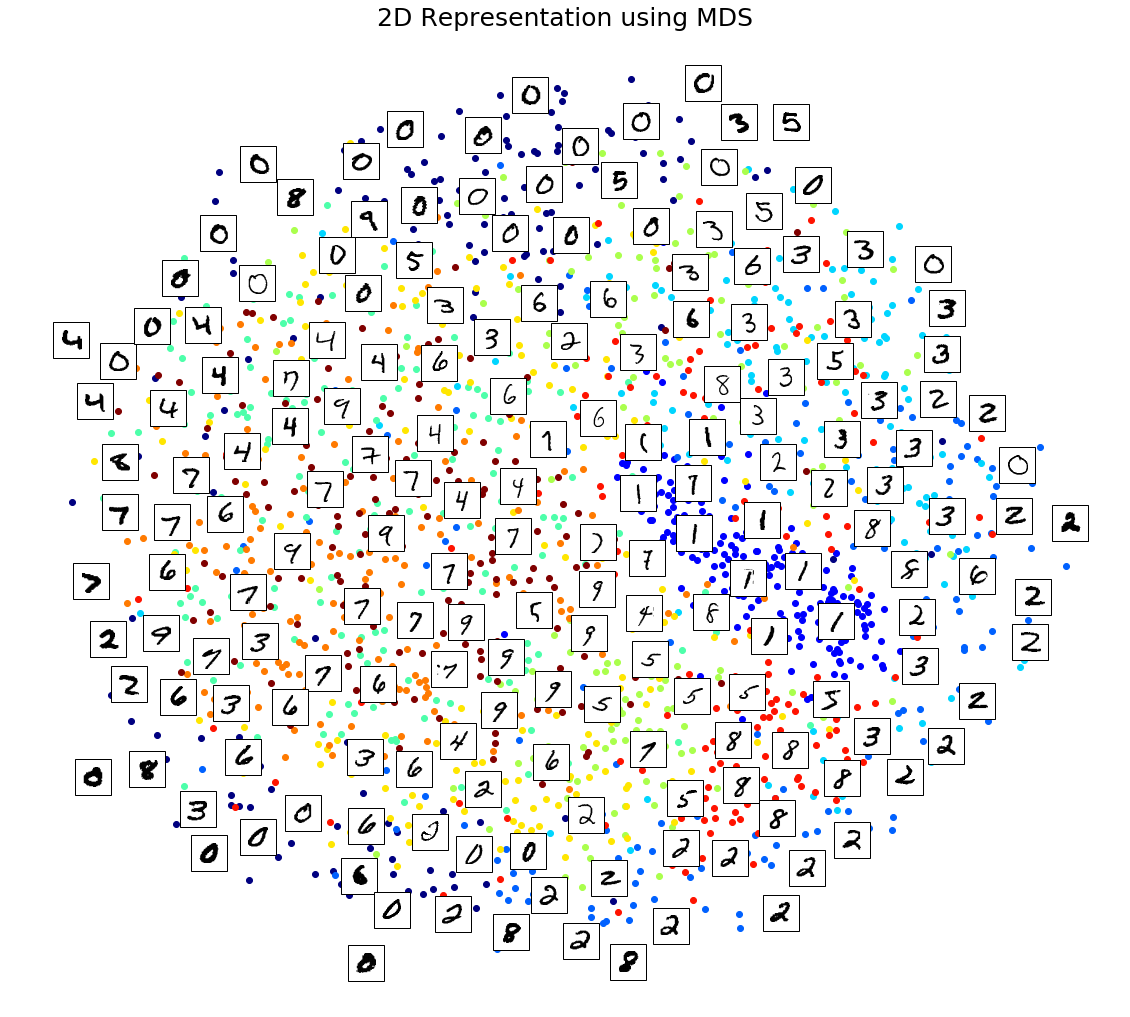

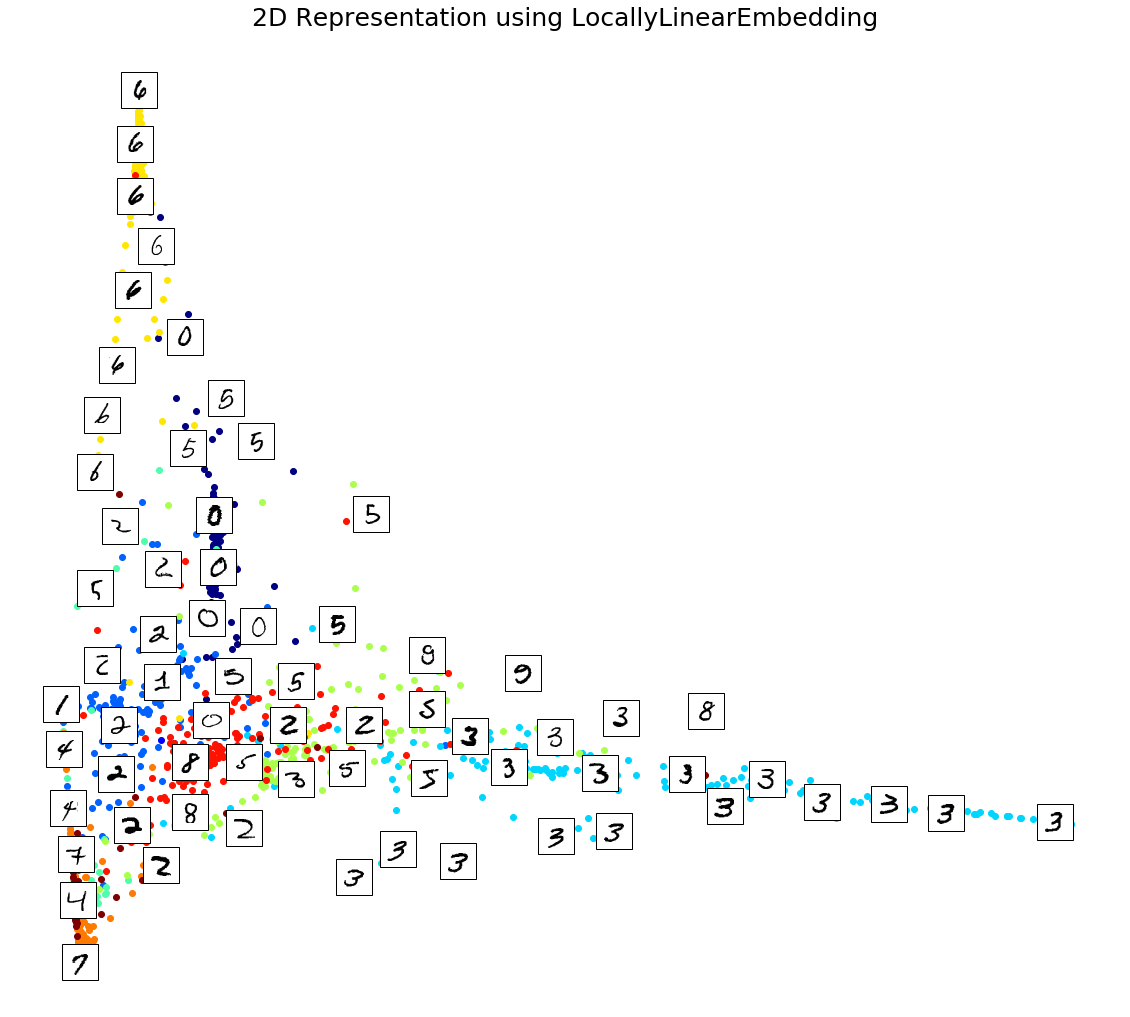

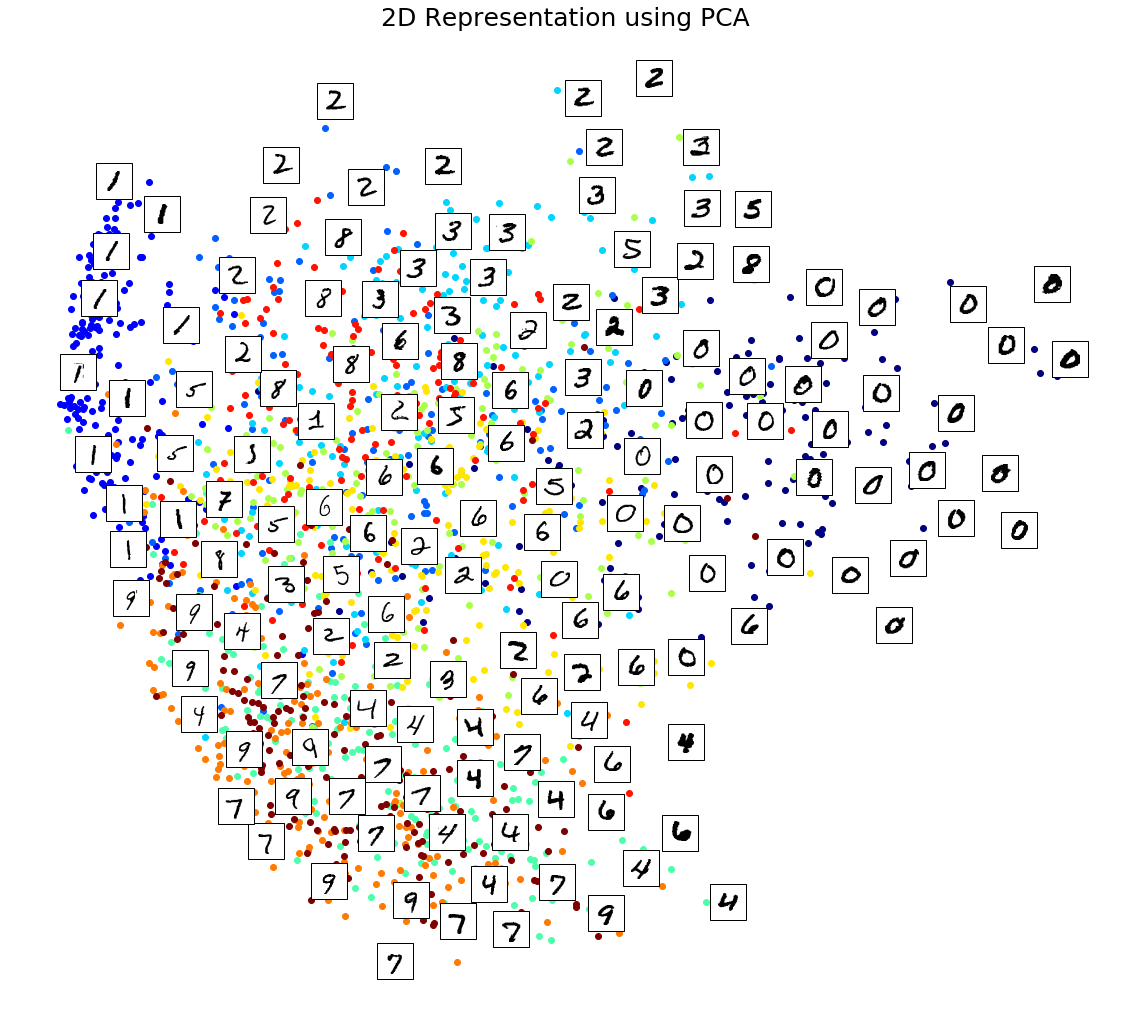

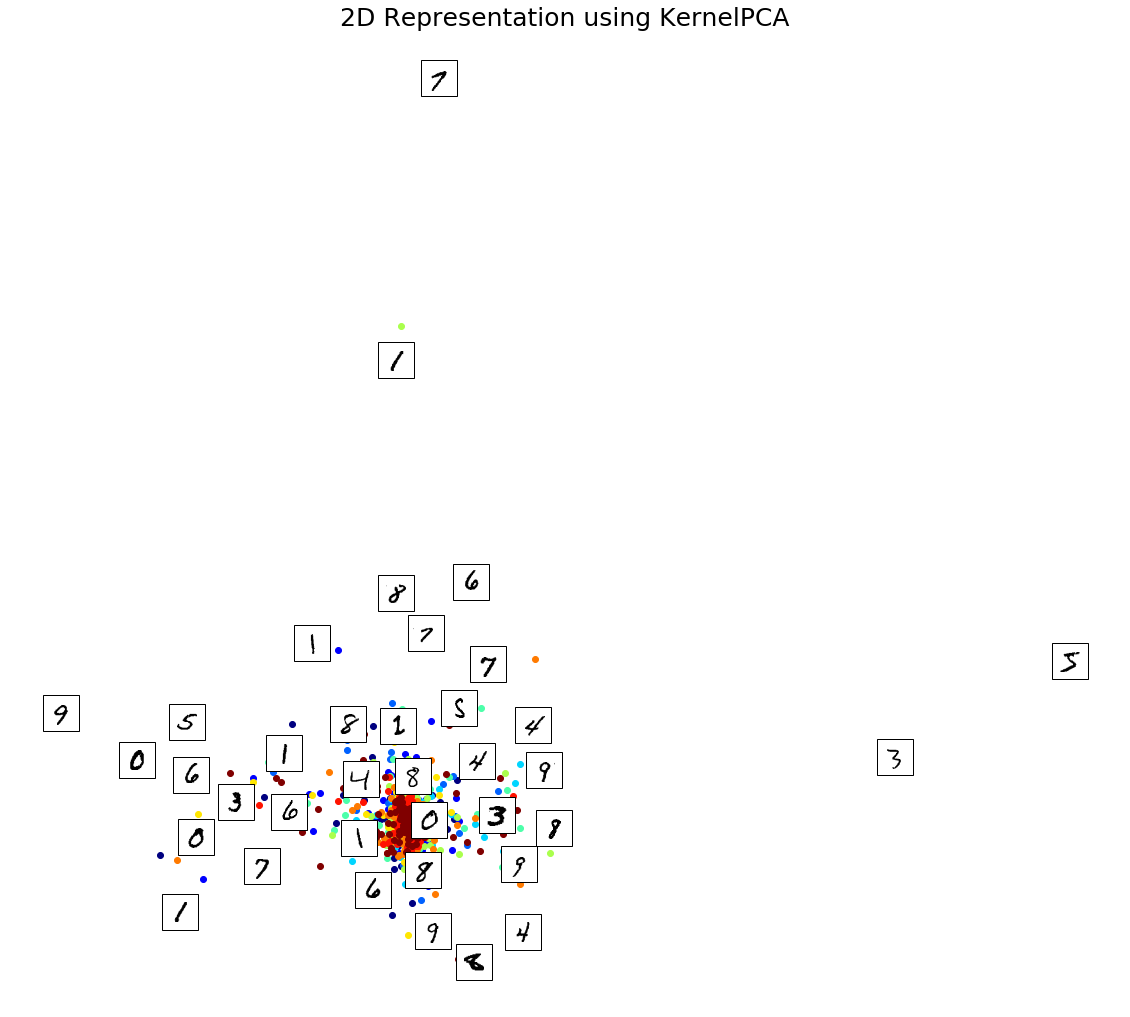

In [98]:
# Time and algorithm
%matplotlib inline
time_list = []
for alg in alg_list:
    t0 = time.time()
    # Fit and Transform the set
    X_transformed = alg.fit_transform(X_random)
    t1 = time.time()
    plot_digits(X_transformed, y_random, X, figsize = (20, 18))
    plt.title("2D Representation using "+ alg.__class__.__name__, fontsize = 25)
    time_list.append(t1-t0)
save_fig("2DRepresentatation")

In [99]:
for time, est in zip(time_list, alg_list):
    print(est.__class__.__name__, " : ", time, "seconds")# MDS takes a lot of time 

MDS  :  248.1359565258026 seconds
LocallyLinearEmbedding  :  11.02643346786499 seconds
PCA  :  0.60595703125 seconds
KernelPCA  :  0.7370421886444092 seconds


**Comments**

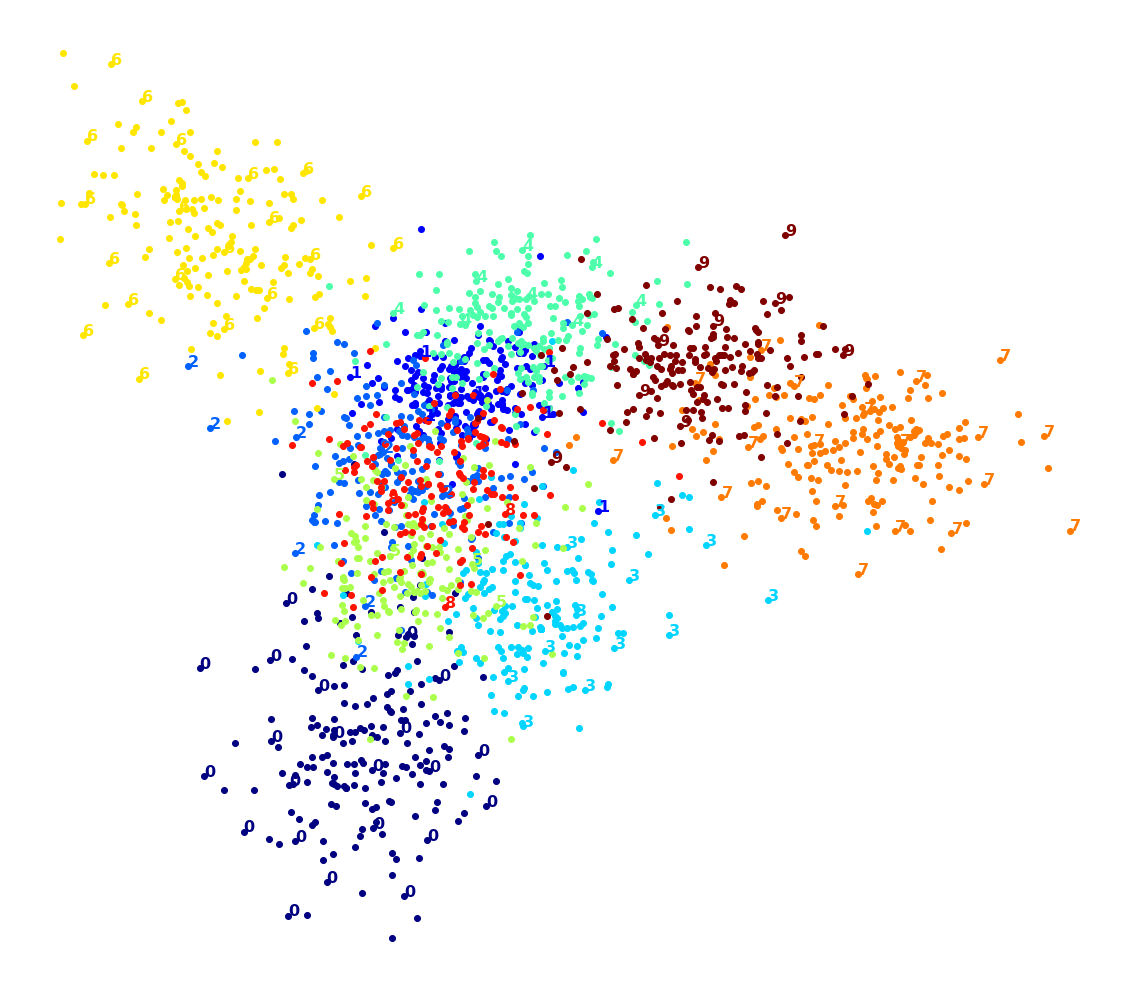

In [100]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_reduced = LinearDiscriminantAnalysis(n_components = 2).fit_transform(X_random, y_random)
plot_digits(X_reduced, y_random, figsize = (20, 18))
save_fig("LDADigits")

## Additional Exercises
(The aim of this exercise is to find out if the training time reduces without harming the performance of a system) 

### TSNE

In [101]:
# importing TSNE
t0= time.time()
Tsne = TSNE(n_components =2)
X_reduced = Tsne.fit_transform(X_random)
t1 = time.time()
plot_digits(X_reduced, y_random, X_random, figsize = (20, 18))

AttributeError: 'float' object has no attribute 'time'

In [ ]:
print(t1-t0)

### TSNE + PCA

In [ ]:
# Out of the observed algorithms, we can say that tSNE seves our interests best 
# But can it be sped up?
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import time 

pca = PCA()
tsne = TSNE(n_components = 2)

# Chaining both the algorithms
pca_tsne = Pipeline([
    ("pca", pca),
    ("tsne", tsne)
])

In [ ]:
# Time and projection 
t0 = time.time()
X_reduced = pca_tsne.fit_transform(X_random)
t1 = time.time()


In [ ]:
# Plot Digits 
plot_digits(X_reduced, y_random, X_random, figsize = (20, 18))

In [ ]:
# time taken 
print(t1-t0)

In [ ]:
Beeper()